### **Dataset Overview**

**Pediatrics**: https://www.kaggle.com/datasets/masahirogotoh/mit-chb-processed/data

This is a processed version of the original CHB MIT EEG dataset, where the data is already split into time chunks.

### **Importing Datasets**

For the CHB MIT EEG dataset:

1. Set up Kaggle API key.
2. Mount to Google Drive.
3. Download Kaggle data onto Google Drive.
4. Load the datasets onto Colab.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!cat ~/.kaggle/kaggle.json

!mkdir -p /gdrive/MyDrive/seizure_detection/data

!cd /gdrive/MyDrive/seizure_detection/data && kaggle datasets download -d masahirogotoh/mit-chb-processed

!mv seizure_detection/data/mit-chb-processed.zip /gdrive/MyDrive/seizure_detection/data

!cd /gdrive/MyDrive/seizure_detection/data && unzip -q mit-chb-processed.zip

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Saving kaggle.json to kaggle (6).json
{"username":"yzeng06","key":"9dbc8c4bc803d3fe4cfca667a5c11433"}Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
mv: cannot stat 'seizure_detection/data/mit-chb-processed.zip': No such file or directory
unzip:  cannot find or open mit-chb-processed.zip, mit-chb-processed.zip.zip or mit-chb-processed.

### **Reading the Data**

1. Install necessary imports.
2. Summarize the data...
*   **Dataset Structure**: the number of samples, channels, durations for each chunk of data we'll be analyzing
*   **Channel Information**: the bipolar pairs represented in this data set allow us to localize abnormalities and spikes within different regions of the brain; the letters represents the specific regions of the brain and the numbers represent the left/right side of that region given the parity of the number
    *  F: frontal
    *  Fp: frontopolar
    *  T: temporal
    *  C: central
    *  P: parietal
    *  O: occipital
    *  A: auricular
*   **Label Distribution:** compares the total number of cases of seizure vs. non-seizure activity
*   **Signal Statistics:** overall average, range, standard deviation of all eeg signals within the dataset across all 18 channels
*   **Technical Specifications:** data types across the dataset
*   **Visualization:** the ratio of seizure to non-seizure samples are visualized using verticle bar charts










CHB-MIT PROCESSED DATASET SUMMARY: 

DATASET STRUCTURE: 
Signal data shape: (9505, 18, 2048)
  - Number of samples: 9505
  - Number of channels: 18
  - Time points per sample: 2048
  - Duration per sample: 8.0 seconds (at 256 Hz)

EEG CHANNELS (18 channels):
  Channel  1: FP1-F7
  Channel  2: F7-T7
  Channel  3: T7-P7
  Channel  4: P7-O1
  Channel  5: FP1-F3
  Channel  6: F3-C3
  Channel  7: C3-P3
  Channel  8: P3-O1
  Channel  9: FP2-F4
  Channel 10: F4-C4
  Channel 11: C4-P4
  Channel 12: P4-O2
  Channel 13: FP2-F8
  Channel 14: F8-T8
  Channel 15: T8-P8
  Channel 16: P8-O2
  Channel 17: FZ-CZ
  Channel 18: CZ-PZ

LABEL DISTRIBUTION:
Total samples: 9505
Seizure samples: 2581 (27.2%)
Non-seizure samples: 6924 (72.8%)
Class imbalance ratio: 2.68:1 (non-seizure:seizure)

SIGNAL STATISTICS:
Signal value range: [-4023.93, 4563.13] µV
Mean signal value: 0.23 µV
Std signal value: 82.45 µV

Per-channel signal ranges: 
  FP1-F7: [-2578.95, 2736.41] µV
  F7-T7: [-2743.05, 2641.47] µV
  T7-P7: 

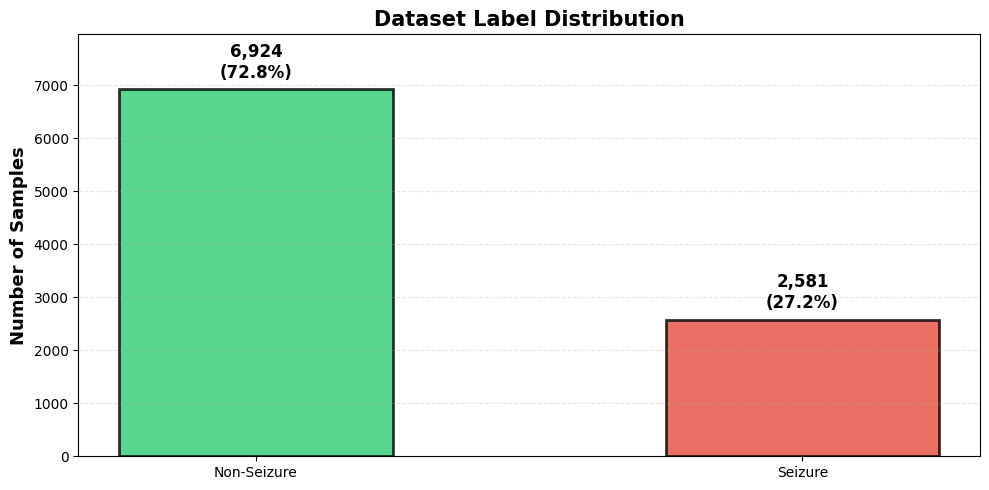

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data from drive
signal_samples = np.load('/gdrive/MyDrive/seizure_detection/data/signal_samples.npy')
is_sz = np.load('/gdrive/MyDrive/seizure_detection/data/is_sz.npy')

print("=" * 40)
print("CHB-MIT PROCESSED DATASET SUMMARY: ")
print("=" * 40)

# num of samples & data types
print("\nDATASET STRUCTURE: ")
print(f"Signal data shape: {signal_samples.shape}")
print(f"  - Number of samples: {signal_samples.shape[0]}")
print(f"  - nNumber of channels: {signal_samples.shape[1]}")
print(f"  - Time points per sample: {signal_samples.shape[2]}")
print(f"  - Duration per sample: {signal_samples.shape[2]/256:.1f} seconds (at 256 Hz)")

# channel info
print("\nEEG CHANNELS (18 channels):")
channels = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1',  # left temporal chain
    'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',  # left parasagittal
    'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',  # right parasagittal
    'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2',  # right temporal chain
    'FZ-CZ', 'CZ-PZ'                      # midline
]
for i, ch in enumerate(channels):
    print(f"  Channel {i + 1:2d}: {ch}")

print("\nLABEL DISTRIBUTION:")
print(f"Total samples: {len(is_sz)}")

# convert to int for counting
seizure_samples = int(np.sum(is_sz))
non_seizure_samples = int(np.sum(~is_sz))

print(f"Seizure samples: {seizure_samples} ({seizure_samples / len(is_sz) * 100:.1f}%)")
print(f"Non-seizure samples: {non_seizure_samples} ({non_seizure_samples / len(is_sz) * 100:.1f}%)")

# calc ratio
if seizure_samples > 0:
    imbalance_ratio = non_seizure_samples / seizure_samples
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}:1 (non-seizure:seizure)")

print("\nSIGNAL STATISTICS:")
print(f"Signal value range: [{signal_samples.min():.2f}, {signal_samples.max():.2f}] µV")
print(f"Mean signal value: {signal_samples.mean():.2f} µV")
print(f"Std signal value: {signal_samples.std():.2f} µV")

# display range of voltage in all 18 channels
print("\nPer-channel signal ranges: ")
for ch in range(signal_samples.shape[1]):
    ch_min = signal_samples[:, ch, :].min()
    ch_max = signal_samples[:, ch, :].max()
    print(f"  {channels[ch]}: [{ch_min:.2f}, {ch_max:.2f}] µV")

print("\nTECHNICAL SPECS:")
print(f"Sampling frequency: 256 Hz")
print(f"Time window: 8 seconds")
print(f"Signal data type: {signal_samples.dtype}")
print(f"Label data type: {is_sz.dtype}")
print(f"Total memory: {signal_samples.nbytes / (1024**2):.1f} MB")

print("\nVISUALIZATIONS:")
plt.figure(figsize=(10, 5))

labels = ['Non-Seizure', 'Seizure']
counts = [non_seizure_samples, seizure_samples]
colors = ['#2ecc71', '#e74c3c']
bars = plt.bar(
    labels,
    counts,
    color = colors,
    alpha = 0.8,
    edgecolor = 'black',
    linewidth = 2,
    width = 0.5
  )

plt.ylabel('Number of Samples', fontsize = 13, fontweight = 'bold')
plt.title('Dataset Label Distribution', fontsize = 15, fontweight = 'bold')
plt.grid(axis = 'y', alpha = 0.3, linestyle = '--')

# count + percentages
for i, (count, bar) in enumerate(zip(counts, bars)):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(counts) * 0.02,
        f'{count:,}\n({count/len(is_sz) * 100:.1f}%)',
        ha = 'center',
        va = 'bottom',
        fontweight = 'bold',
        fontsize = 12
    )

plt.ylim(0, max(counts) * 1.15)
plt.tight_layout()
plt.savefig('/gdrive/MyDrive/seizure_detection/figures/phase_1/dataset_summary.png', dpi = 150, bbox_inches = 'tight')
plt.show()

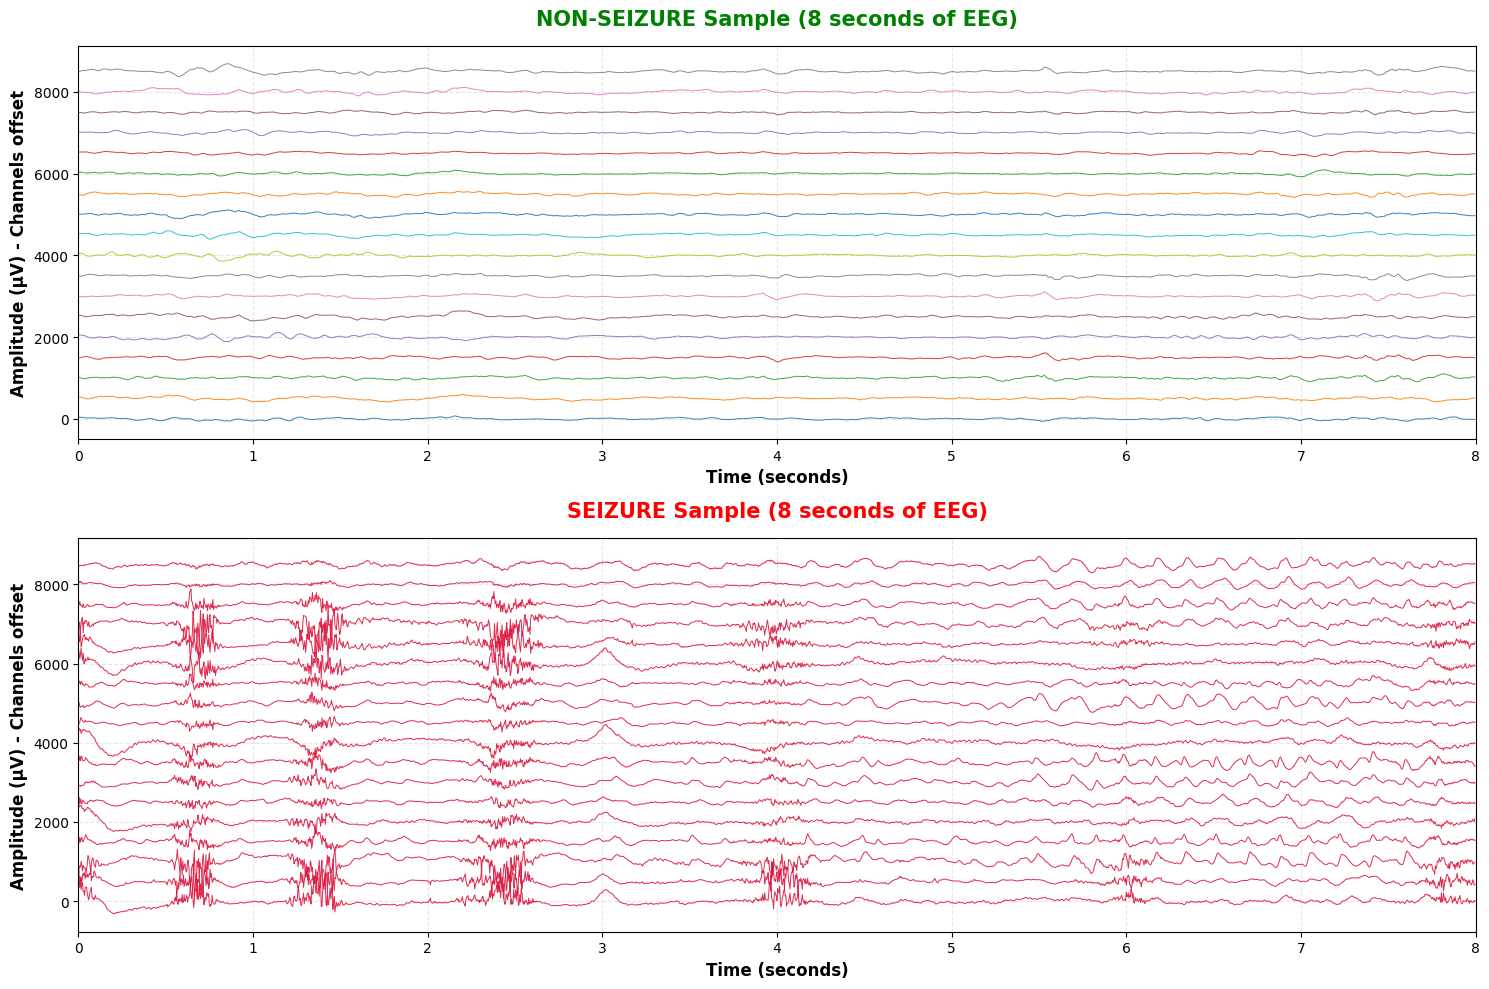

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# obtain indices of datapoints of seizures vs. non-seizure activity
non_seizure_indices = np.where(~is_sz)[0]
seizure_indices = np.where(is_sz)[0]

time = np.arange(signal_samples.shape[2]) / 256  # convert to secs

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2',
            'FZ-CZ', 'CZ-PZ']

# plot non-seizure
axes[0].set_title(
    f'NON-SEIZURE Sample (8 seconds of EEG)',
    fontsize = 15,
    fontweight = 'bold',
    color = 'green',
    pad = 15
)
offset = 500
for ch in range(18):
    axes[0].plot(
        time,
        signal_samples[non_seizure_idx, ch, :] + ch*offset,
        linewidth = 0.7,
        alpha = 0.9,
        label = channels[ch] if ch < 3 else ""
    )
axes[0].set_ylabel('Amplitude (µV) - Channels offset', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Time (seconds)', fontsize = 12, fontweight = 'bold')
axes[0].grid(alpha = 0.3, linestyle = '--')
axes[0].set_xlim([0, 8])

# plot seizure
axes[1].set_title(
    f'SEIZURE Sample (8 seconds of EEG)',
    fontsize = 15,
    fontweight = 'bold',
    color = 'red',
    pad = 15
  )
for ch in range(18):
    axes[1].plot(
        time,
        signal_samples[seizure_idx, ch, :] + ch*offset,
        linewidth = 0.7,
        alpha = 0.9,
        color = 'crimson'
      )
axes[1].set_ylabel('Amplitude (µV) - Channels offset', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Time (seconds)', fontsize = 12, fontweight = 'bold')
axes[1].grid(alpha = 0.3, linestyle = '--')
axes[1].set_xlim([0, 8])

plt.tight_layout()
plt.savefig('/gdrive/MyDrive/seizure_detection/figures/phase_1/signal_examples.png', dpi = 150, bbox_inches = 'tight')
plt.show()


### **Building the CNN Model** ###

1. Import the necessary Python libraries.
2. Standardize the data and configure dimensions.
3. Split the annotated data into testing and training following the 80/20 rule, making sure that each set of data includes data points from all 18 channels.
4. Build the convolutional layers. For each layer:
    *   restandardize data & apply padding to avoid shrinkage (which would mess up our model)
    *   trim off less important signals to make our model faster by pooling
    *   randomly drop off certain neurons to avoid memorization
5. Account for bias in our dataset due to high difference of number of seizure vs. non-seizure samples.
6. Compile the model & then train using the training data set.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = np.transpose(signal_samples, (0, 2, 1))
y = is_sz.astype(int)

x_train, x_test, y_train, y_test = train_test_split(
  x, y,
  test_size = 0.2,
  random_state = 42,
  stratify = y
)

mean = x_train.mean(axis = (0, 1), keepdims = True)
std = x_train.std(axis = (0, 1), keepdims = True)

x_train_norm = (x_train - mean) / (std + 1e-8)
x_test_norm = (x_test - mean) / (std + 1e-8)

In [ ]:
model = models.Sequential([
    layers.Input(shape = (2048, 18)), # time per sample, channels per sample)

    layers.Conv1D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(), # restandardizes data
    layers.MaxPooling1D(pool_size = 2),
    layers.Dropout(0.2), # prevents memorization

    layers.Conv1D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size = 2),
    layers.Dropout(0.3),

    layers.Conv1D(128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size = 2),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling1D(),

    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 2048, 32)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2048, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1024, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1024, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 512, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 256, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,401 (228.13 KB)

 Trainable params: 57,953 (226.38 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [ ]:
non_seizure_count = np.sum(y_train == 0)
seizure_count = np.sum(y_train == 1)
total = len(y_train)

weight_for_0 = (1 / non_seizure_count) * (total / 2.0)
weight_for_1 = (1 / seizure_count) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001), # how fast model adapts weights
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        keras.metrics.Precision(name = 'precision'), # true +
        keras.metrics.Recall(name = 'recall'), # detected +
        keras.metrics.AUC(name = 'auc') # area under curve
    ]
)

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1
)

checkpoint = ModelCheckpoint(
    '/gdrive/MyDrive/seizure_detection/models/best_model.keras',
    monitor = 'val_auc',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [ ]:
output = model.fit(
    x_train_norm, y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 32,
    class_weight = class_weight,
    callbacks = [early_stop, checkpoint],
    verbose = 1
)

Epoch 1/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6374 - auc: 0.6830 - loss: 0.6324 - precision: 0.3860 - recall: 0.5871
Epoch 1: val_auc improved from -inf to 0.92215, saving model to /gdrive/MyDrive/seizure_detection/models/best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 202ms/step - accuracy: 0.6382 - auc: 0.6839 - loss: 0.6317 - precision: 0.3869 - recall: 0.5879 - val_accuracy: 0.8823 - val_auc: 0.9222 - val_loss: 0.3752 - val_precision: 0.9257 - val_recall: 0.6103
Epoch 2/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8537 - auc: 0.9071 - loss: 0.3910 - precision: 0.7081 - recall: 0.7965
Epoch 2: val_auc improved from 0.92215 to 0.94139, saving model to /gdrive/MyDrive/seizure_detection/models/best_model.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.8537 - auc: 0.9072 - loss: 0.3908 - precision: 0.7081 - recall: 0.7968 - val_accuracy: 0.8948 - val_auc: 0.9414 - val_loss: 0.2596 - val_precision: 0.8523 - val_recall: 0.7353
Epoch 3

### **Visualize The Model's Accuracy and Precision**

In [ ]:
# summary of results

test_results = model.evaluate(x_test_norm, y_test, verbose = 1)

print(f"\nTest Results:")
print(f"  Loss: {test_results[0]:.4f}")
print(f"  Accuracy: {test_results[1]:.4f}")
print(f"  Precision: {test_results[2]:.4f}")
print(f"  Recall: {test_results[3]:.4f}")
print(f"  AUC: {test_results[4]:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9419 - auc: 0.9693 - loss: 0.1899 - precision: 0.9375 - recall: 0.8481

Test Results:
  Loss: 0.1826
  Accuracy: 0.9427
  Precision: 0.9339
  Recall: 0.8488
  AUC: 0.9702


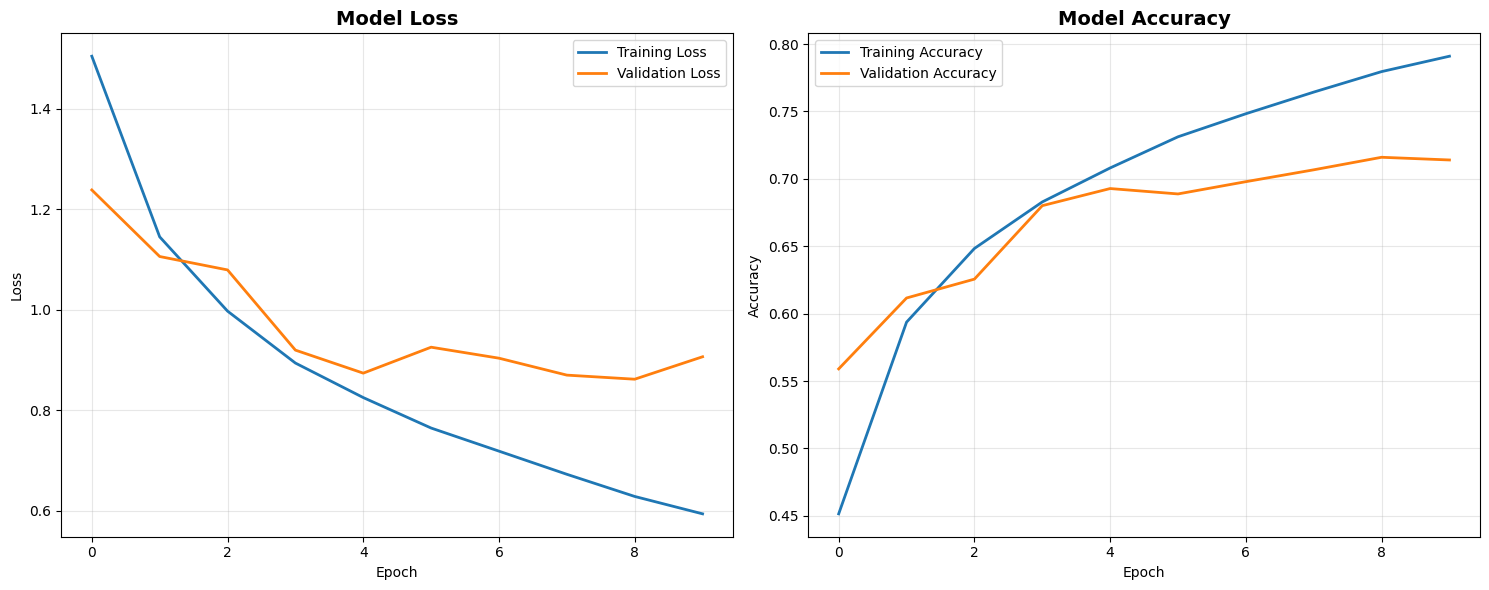

In [ ]:
# Create 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# loss over iterations
axes[0].plot(history.history['loss'], label = 'Training Loss', linewidth = 2)
axes[0].plot(history.history['val_loss'], label = 'Validation Loss', linewidth = 2)
axes[0].set_title('Model Loss', fontsize = 14, fontweight = 'bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(alpha = 0.3)

# accuracy over iterations
axes[1].plot(history.history['accuracy'], label = 'Training Accuracy', linewidth = 2)
axes[1].plot(history.history['val_accuracy'], label = 'Validation Accuracy', linewidth = 2)
axes[1].set_title('Model Accuracy', fontsize = 14, fontweight = 'bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(alpha = 0.3)

plt.tight_layout()
plt.savefig('/gdrive/MyDrive/seizure_detection/figures/phase_2/training_history.png', dpi = 150, bbox_inches = 'tight')
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


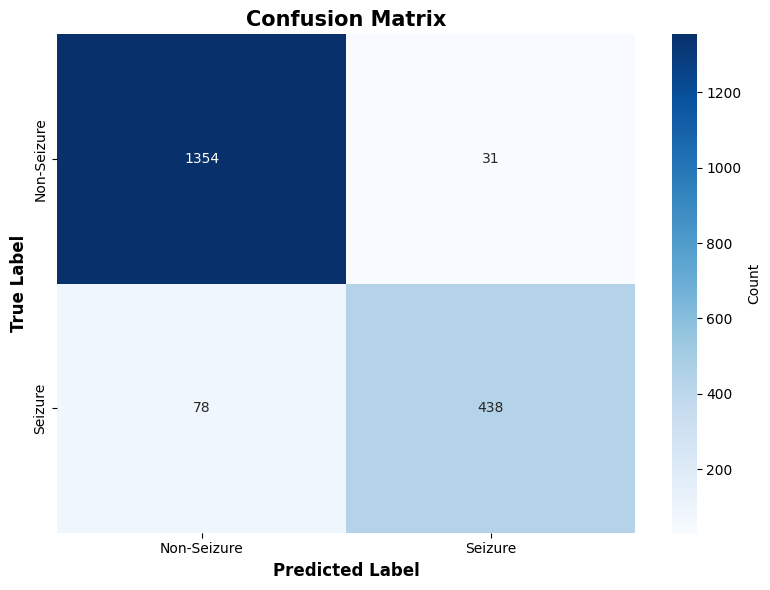

In [ ]:
# confusion matrix

y_pred_prob = model.predict(x_test_norm)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot = True,
    fmt = 'd',
    cmap = 'Blues',
    xticklabels=['Non-Seizure', 'Seizure'],
    yticklabels=['Non-Seizure', 'Seizure'],
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix', fontsize = 15, fontweight = 'bold')
plt.ylabel('True Label', fontsize = 12, fontweight = 'bold')
plt.xlabel('Predicted Label', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.savefig('/gdrive/MyDrive/seizure_detection/figures/phase_1/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()